In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, precision_recall_curve, auc
from sklearn.preprocessing import OneHotEncoder


In [37]:
# Cargar los datos
datos = pd.read_csv('Titanic-Dataset.csv')

# Exploración inicial de los datos
print("\nDescripción estadística de variables numéricas:")
print(datos.describe())

# Manejo de valores faltantes
print("\nValores faltantes por columna:")
print(datos.isnull().sum())



Descripción estadística de variables numéricas:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Valores faltantes por columna:


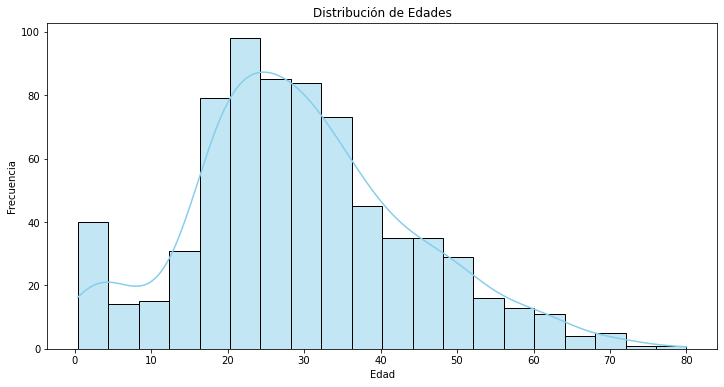

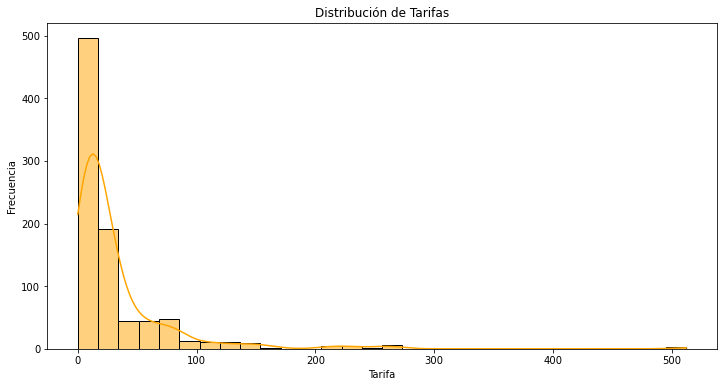

In [14]:
# Distribución de variables numéricas
plt.figure(figsize=(12, 6))
sns.histplot(datos['Age'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(datos['Fare'], bins=30, kde=True, color='orange')
plt.title('Distribución de Tarifas')
plt.xlabel('Tarifa')
plt.ylabel('Frecuencia')
plt.show()


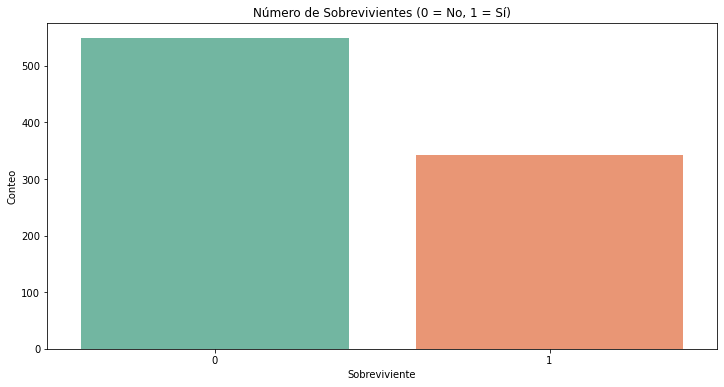

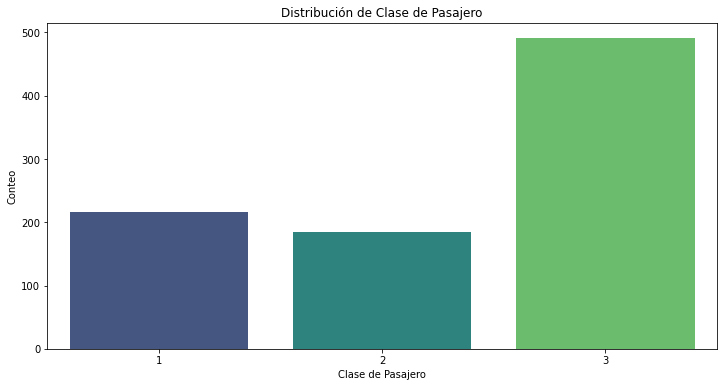

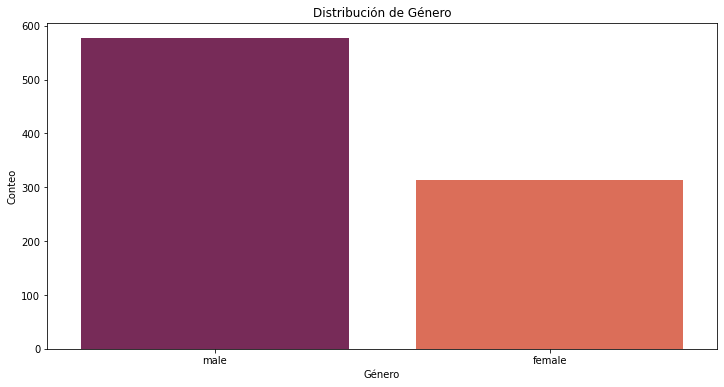

In [15]:
# Distribución de variables categóricas
plt.figure(figsize=(12, 6))
sns.countplot(data=datos, x='Survived', palette='Set2')
plt.title('Número de Sobrevivientes (0 = No, 1 = Sí)')
plt.xlabel('Sobreviviente')
plt.ylabel('Conteo')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=datos, x='Pclass', palette='viridis')
plt.title('Distribución de Clase de Pasajero')
plt.xlabel('Clase de Pasajero')
plt.ylabel('Conteo')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=datos, x='Sex', palette='rocket')
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Conteo')
plt.show()

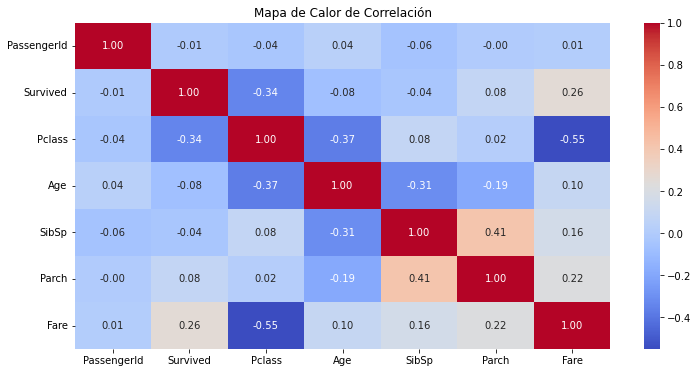

<Figure size 864x432 with 0 Axes>

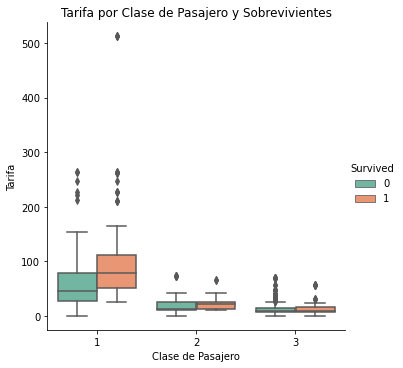

<Figure size 864x432 with 0 Axes>

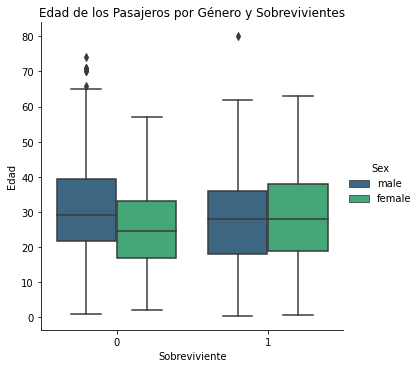

In [16]:
# Relaciones entre variables
plt.figure(figsize=(12, 6))
sns.heatmap(datos.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación')
plt.show()

plt.figure(figsize=(12, 6))
sns.catplot(data=datos, x='Pclass', y='Fare', hue='Survived', kind='box', palette='Set2')
plt.title('Tarifa por Clase de Pasajero y Sobrevivientes')
plt.xlabel('Clase de Pasajero')
plt.ylabel('Tarifa')
plt.show()

plt.figure(figsize=(12, 6))
sns.catplot(data=datos, x='Survived', y='Age', hue='Sex', kind='box', palette='viridis')
plt.title('Edad de los Pasajeros por Género y Sobrevivientes')
plt.xlabel('Sobreviviente')
plt.ylabel('Edad')
plt.show()

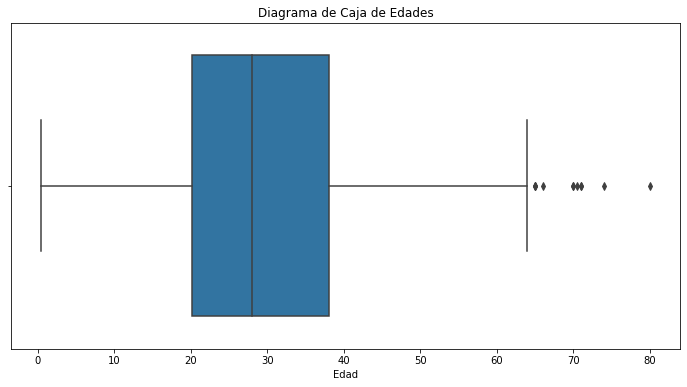

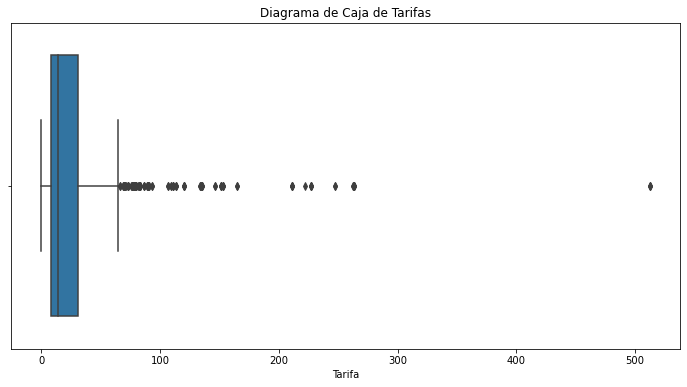

In [18]:
# Manejo de valores atípicos
plt.figure(figsize=(12, 6))
sns.boxplot(data=datos, x='Age')
plt.title('Diagrama de Caja de Edades')
plt.xlabel('Edad')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=datos, x='Fare')
plt.title('Diagrama de Caja de Tarifas')
plt.xlabel('Tarifa')
plt.show()

In [19]:
# Se imputa valores faltantes con la media
imputer = SimpleImputer(strategy='mean')

# Aplicamos la imputación a las columnas con valores faltantes
datos[['Age']] = imputer.fit_transform(datos[['Age']])


In [23]:
# Se imputa valores faltantes con la moda
imputerCabin = SimpleImputer(strategy='most_frequent')

# Aplicamos la imputación a las columnas con valores faltantes
datos[['Cabin']] = imputerCabin.fit_transform(datos[['Cabin']])

In [24]:
# Se imputa valores faltantes con la moda
imputerCabin = SimpleImputer(strategy='most_frequent')

# Aplicamos la imputación a las columnas con valores faltantes
datos[['Embarked']] = imputerCabin.fit_transform(datos[['Embarked']])


In [25]:
# Manejo de valores faltantes
print("\nValores faltantes por columna:")
print(datos.isnull().sum())


Valores faltantes por columna:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


Mejores hiperparámetros encontrados: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}


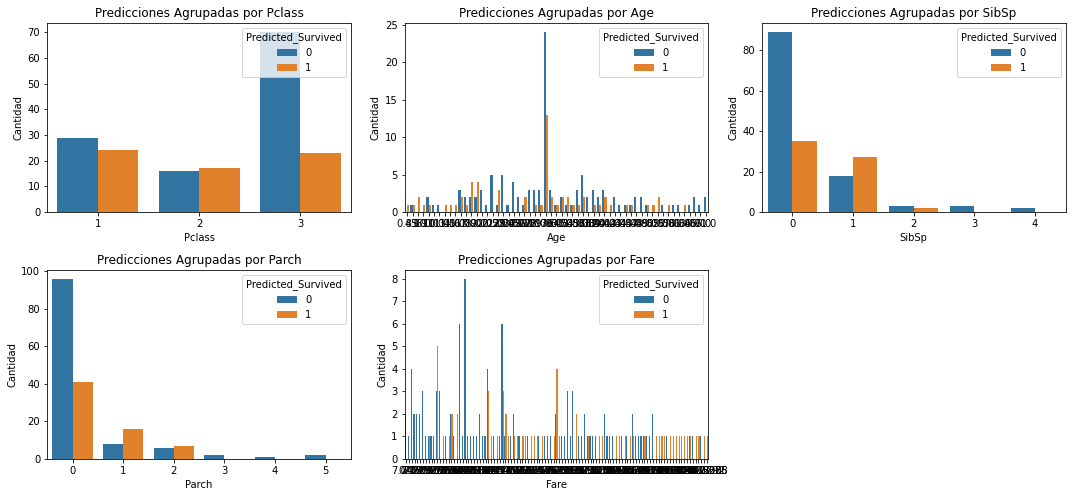

Accuracy Score: 0.7988826815642458

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
[[92 13]
 [23 51]]


In [34]:
# Codificar variables categóricas
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(datos[['Sex', 'Embarked']])  
encoded_df = pd.concat([datos.drop(['Sex', 'Embarked'], axis=1), pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(['Sex', 'Embarked']))], axis=1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X = encoded_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = encoded_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los hiperparámetros que deseas ajustar
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear y entrenar el modelo de árbol de decisión
tree_classifier = DecisionTreeClassifier(random_state=42)

# Configurar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(estimator=tree_classifier, param_grid=param_grid, cv=5)

# Entrenar el modelo
grid_search.fit(X_train, y_train)

# Obtener la mejor combinación de hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

# Realizar predicciones en el conjunto de prueba con el modelo ajustado
y_pred = grid_search.predict(X_test)

# Crear DataFrame con las predicciones
predictions_df = pd.DataFrame({'Actual_Survived': y_test, 'Predicted_Survived': y_pred})

# Obtener características
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare',]

# Crear subgráficos para cada característica
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, hue='Predicted_Survived', data=pd.concat([X_test, predictions_df], axis=1))
    plt.title(f'Predicciones Agrupadas por {feature}')
    plt.xlabel(feature)
    plt.ylabel('Cantidad')
    plt.legend(title='Predicted_Survived', loc='upper right')

plt.tight_layout()
plt.show()

# Evaluar el rendimiento del modelo
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


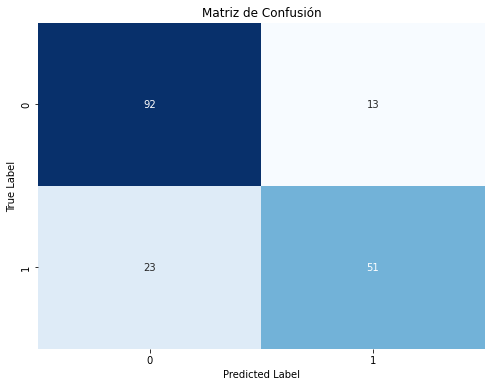

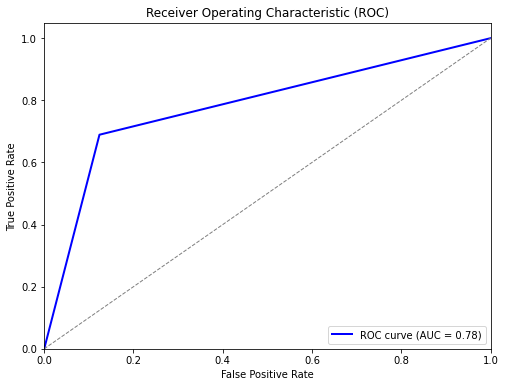

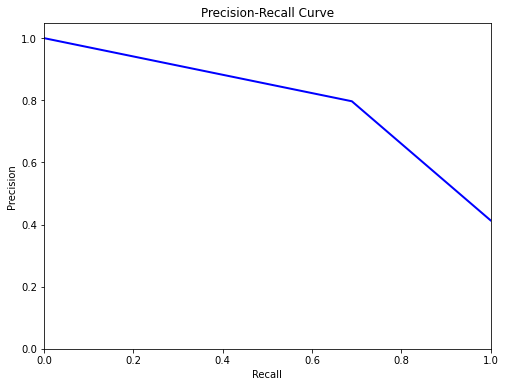

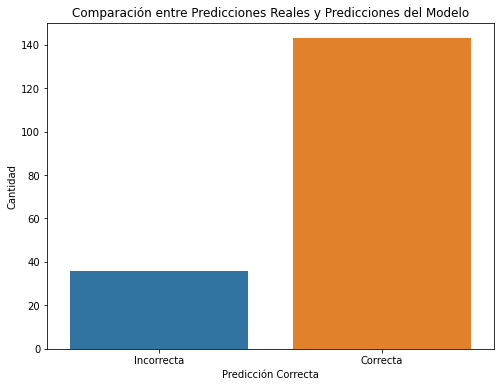

In [35]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusión")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Gráfico de barras para comparar las predicciones reales con las predicciones del modelo
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df['Correct'] = comparison_df['Actual'] == comparison_df['Predicted']
plt.figure(figsize=(8, 6))
sns.countplot(x='Correct', data=comparison_df)
plt.title('Comparación entre Predicciones Reales y Predicciones del Modelo')
plt.xlabel('Predicción Correcta')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['Incorrecta', 'Correcta'])
plt.show()
